In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install pythainlp
!pip install attacut
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

     |████████████████████████████████| 11.1MB 269kB/s 
     |████████████████████████████████| 1.4MB 41.7MB/s 
     |████████████████████████████████| 21.7MB 1.4MB/s 
     |████████████████████████████████| 747kB 50.4MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434673 sha256=d13703a9b4777594811d5925d0757d07882a255aa51f410fb9b473aa1cbec3d0
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
ERROR: chainer 6.5.0 has requirement typing-extensions<=3.6.6, but you'll have typing-extensions 3.7.4.2 which is incompatible.
  Found existing installation: typing-extensions 3.6.6
    Uninstalling typing-extensions-3.6.6:
      Successfully uninstalled typing-extensions-3.6.6
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 1.3MB 2.7MB/s 
     |████████████████████████████████| 276kB 16.2

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import glob

import warnings
from pythainlp import word_tokenize
from ast import literal_eval
from tqdm import tqdm_notebook
from collections import Counter

#viz
from plotnine import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """Entry point for launching an IPython kernel.


In [0]:
# # test glob
# path = "/content/drive/My Drive/Colab Notebooks/nlp/course_project/news_data/*.csv"
# filenames = glob.glob(path)
# label_list = []
# label_dict = {'101': 'การบิน', '108': 'พลังงานไฟฟ้า', '109': 'น้ำมัน', '115': 'อสังหา'
#             , '129': 'ธุรกิจค้าปลีก', '401': 'ธนาคาร', '1003': 'สงคราม', '1004': 'ภัยพิบัติ', '1005': 'โรคระบาด'}

# for file in filenames:
#     print(file.split('/')[-1])

# for file in filenames:
#     label_list.append(label_dict[file.split('/')[-1].split('_')[0]])
# print(label_list)

109_done.csv
108_done.csv
101_done.csv
115_done.csv
129_done.csv
401_done.csv
1004_done.csv
1003_done.csv
1005_done.csv
['น้ำมัน', 'พลังงานไฟฟ้า', 'การบิน', 'อสังหา', 'ธุรกิจค้าปลีก', 'ธนาคาร', 'ภัยพิบัติ', 'สงคราม', 'โรคระบาด']


In [0]:
def loadCSVToDataframe(filenames, label_list):
    """ return dataframe contain data from all files with label column """
    
    df_list = []

    for i, file in enumerate(filenames):
        df = pd.read_csv(file)
        df['label'] = label_list[i]
        df_list.append(df)
    return pd.concat(df_list)

def createLabelList(filenames, label_dict):
    """ create label_list associated with filenames from label_dict"""
    label_list = []

    for file in filenames:
        dict_key = file.split('/')[-1].split('_')[0]
        label_list.append(label_dict[dict_key])    
    
    return label_list

# create list of files absolute path
path = "/content/drive/My Drive/Colab Notebooks/nlp/course_project/news_data/"
filenames = glob.glob(path + '*.csv')


label_dict = {'101': 'การบิน', '108': 'พลังงานไฟฟ้า', '109': 'น้ำมัน', '115': 'อสังหา'
            , '129': 'ธุรกิจค้าปลีก', '401': 'ธนาคาร', '1003': 'สงคราม', '1004': 'ภัยพิบัติ', '1005': 'โรคระบาด'}
label_list = createLabelList(filenames, label_dict)


master_df = loadCSVToDataframe(filenames, label_list)
master_df

,date,headline,label
0,1/6/2006,คอลัมน์เกาะติดเศรษฐกิจ-การเงิน:น้ำมันแพงเกี่ยว...,น้ำมัน
1,1/6/2006,มิ.ย.คนไทยซดน้ำมันแพง'วเศษ'รับไม่ต่ำกว่า30บ./ลิตร,น้ำมัน
2,1/6/2006,ต่างชาติถล่มขายหุ้นเครือปตท.มาร์เก็ตแคปพ.ค.หาย...,น้ำมัน
3,1/6/2006,คอลัมน์กรุงเทพมอนิเตอร์:หน้า24,น้ำมัน
4,1/6/2006,คาดโอเปคไม่ผลิตเพิ่มหวั่นน้ำมันราคาพุ่งยันปริม...,น้ำมัน
...,...,...,...
47523,14/2/2020,คอลัมน์ย่องก๊วน,โรคระบาด
47524,14/2/2020,คอลัมน์โลกาภิวัตน์:ส่งเสริมความเข้าใจ,โรคระบาด
47525,14/2/2020,คอลัมน์คาบลูกคาบดอก:อยู่ด้วยความหวัง,โรคระบาด
47526,14/2/2020,คอลัมน์จดหมายถึงเดลินิวส์,โรคระบาด


In [0]:
# make change to df
df = master_df

In [0]:
df.describe()

,date,headline,label
count,2228591,2228591,2228591
unique,5006,1528466,9
top,25/10/2011,คอลัมน์สังคมธุรกิจ,ธนาคาร
freq,1479,6917,609026


In [0]:
## Lower
df['headline'] = df['headline'].str.lower().copy()
display(df['headline'].describe())

count                2228591
unique               1525288
top       คอลัมน์สังคมธุรกิจ
freq                    6917
Name: headline, dtype: object

In [0]:
## Duplicates
df = df.drop_duplicates("headline", keep="first")
display(df['headline'].describe())

count                                               1525288
unique                                              1525288
top       แบงก์ชาติหวั่นผู้ต้องหาคดี"มหานคร"ชิ่งชี้19ม.ค...
freq                                                      1
Name: headline, dtype: object

In [0]:
## Punctuation
import string
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return nopunc

df['headline'] = df.headline.map(lambda x: ''.join(process_text(x)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
df.describe()

,date,headline,label
count,1525288,1525288,1525288
unique,5006,1517815,9
top,25/10/2011,คอลัมน์เรียงคนมาเป็นข่าว,ธนาคาร
freq,976,9,399810


In [0]:
## Delete
cword = 'คอลัมน์|ภาพข่าว|กรุงเทพมอนิเตอร์|รายงาน|สัมภาษณ์'
df['headline'] = df['headline'].str.replace(cword, '')
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,headline,label
0,1/6/2006,เกาะติดเศรษฐกิจการเงินน้ำมันแพงเกี่ยวข้องกับค่า,น้ำมัน
1,1/6/2006,มิยคนไทยซดน้ำมันแพงวเศษรับไม่ต่ำกว่า30บลิตร,น้ำมัน
2,1/6/2006,ต่างชาติถล่มขายหุ้นเครือปตทมาร์เก็ตแคปพคหายแสน...,น้ำมัน
3,1/6/2006,หน้า24,น้ำมัน
4,1/6/2006,คาดโอเปคไม่ผลิตเพิ่มหวั่นน้ำมันราคาพุ่งยันปริม...,น้ำมัน
...,...,...,...
47510,14/2/2020,ในประเทศไวรัสโคโรนาคร่าชีวิตคนทะลุพันเรือ,โรคระบาด
47511,14/2/2020,thaiofficialskeepingclosewatchoncruiseship,โรคระบาด
47517,14/2/2020,หมอจีนระส่ำคนไข้โควิด19ล้น,โรคระบาด
47521,14/2/2020,สธเผยชายจีนติดไวรัสหายดีเตรียมกลับบ้านอีก1รายไ...,โรคระบาด


In [0]:
## Missing
df.isnull().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525288 entries, 0 to 47522
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   date      1525288 non-null  object
 1   headline  1525288 non-null  object
 2   label     1525288 non-null  object
dtypes: object(3)
memory usage: 46.5+ MB


In [0]:
len(df.headline.unique())

1514049

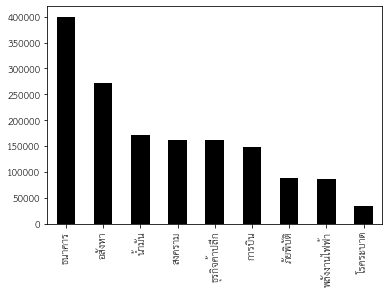

In [0]:
df['label'].value_counts().plot.bar(color = 'black', figsize = (6, 4))

In [0]:
# checking out 'โรคระบาด' from the dataset
df[df['label'] == 'โรคระบาด'].head(10)

,date,headline,label
0,1/6/2006,delhinottopofhivleague,โรคระบาด
1,1/6/2006,หวัดนกลามไม่เลิกอิเหนาตายอีกเจ้าหน้าที่ถกเครีย...,โรคระบาด
2,1/6/2006,diseasespreadsinburmavietnam,โรคระบาด
3,1/6/2006,เฝ้าระวังหวัดนกคืนชีพ,โรคระบาด
5,1/6/2006,กรมวิทย์หนุนไบโอเทควิจัยโรคอุบัติเหตุใหม่เป้าแ...,โรคระบาด
6,1/6/2006,จอดป้ายประชาชื่นหวัดนกหวัดใหญ่วัคซีนจบ,โรคระบาด
7,1/6/2006,ปรับแผนสกัดหวัดนกจี้โรชส่งทามิฟลู24ชม,โรคระบาด
8,1/6/2006,thailandaxeshumanvaccinetrialplannedwith,โรคระบาด
9,1/6/2006,ยูเอ็นห่วงภาวะเอดส์เอเชียอินเดียยอดพุ่งแซงแอฟริกา,โรคระบาด
11,2/6/2006,แผนสกัดหวัดนกระบาดคนสู่คน,โรคระบาด


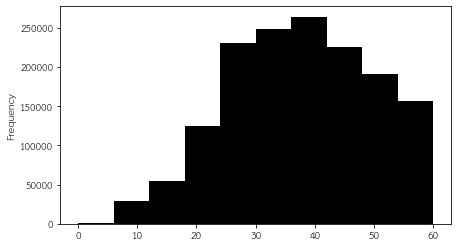

In [0]:
# show distribution of the length of sentence in headline column
length_df = df['headline'].str.len().plot.hist(color = 'black', figsize = (7, 4))

In [0]:
# adding a column to represent the length of the headline
df['len'] = df['headline'].str.len()
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,headline,label,len
0,1/6/2006,เกาะติดเศรษฐกิจการเงินน้ำมันแพงเกี่ยวข้องกับค่า,น้ำมัน,47
1,1/6/2006,มิยคนไทยซดน้ำมันแพงวเศษรับไม่ต่ำกว่า30บลิตร,น้ำมัน,43
2,1/6/2006,ต่างชาติถล่มขายหุ้นเครือปตทมาร์เก็ตแคปพคหายแสน...,น้ำมัน,50
3,1/6/2006,หน้า24,น้ำมัน,6
4,1/6/2006,คาดโอเปคไม่ผลิตเพิ่มหวั่นน้ำมันราคาพุ่งยันปริม...,น้ำมัน,59
5,1/6/2006,พิรุธขาใหญ่ทิ้ง,น้ำมัน,15
6,1/6/2006,ปฏิทินธุรกิจ,น้ำมัน,12
7,1/6/2006,สศกคาดผลไม้ปี49ล้านตลาดพิษน้ำมันส่งผลกำลังซื้อ...,น้ำมัน,50
8,1/6/2006,ข่าวบริษัทจดทะเบียน,น้ำมัน,19
9,1/6/2006,stanlyกัดฟันรักษายอดโต10โชว์โมเดลใหม่เพิ่มมูลค...,น้ำมัน,54


In [0]:
df.groupby('label').describe()

len                                                   
                  count       mean        std  min   25%   50%   75%   max
label                                                                     
การบิน         148883.0  36.327089  11.851621  0.0  28.0  36.0  45.0  60.0
ธนาคาร         399810.0  37.585331  12.041438  0.0  28.0  38.0  47.0  60.0
ธุรกิจค้าปลีก  160947.0  36.048724  12.621456  0.0  26.0  36.0  46.0  60.0
น้ำมัน         172293.0  37.238588  12.613652  0.0  28.0  38.0  48.0  60.0
พลังงานไฟฟ้า    87202.0  38.331770  12.147930  3.0  29.0  39.0  48.0  60.0
ภัยพิบัติ       87587.0  35.451951  12.244585  0.0  27.0  35.0  44.0  60.0
สงคราม         161721.0  35.784672  11.012575  2.0  28.0  35.0  43.0  60.0
อสังหา         271881.0  37.734891  11.954306  1.0  29.0  38.0  47.0  60.0
โรคระบาด        34964.0  36.862687  11.389445  2.0  29.0  36.0  45.0  60.0

In [0]:
# count data that len < 20
low_len_df = df[df["len"] <= 20]
print(len(low_len_df.index))

135024


In [0]:
# Delete df[df["len"] <= 20]
df = df[df["len"] > 20]

In [0]:
# used GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# adding a column to represent token of the headline
df['token'] = df['headline'].apply(word_tokenize, engine="attacut")
df['wc'] = df['token'].str.len()
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,headline,label,len,token,wc
0,1/6/2006,เกาะติดเศรษฐกิจการเงินน้ำมันแพงเกี่ยวข้องกับค่า,น้ำมัน,47,"[เกาะติด, เศรษฐกิจ, การ, เงิน, น้ำมัน, แพง, เก...",9
1,1/6/2006,มิยคนไทยซดน้ำมันแพงวเศษรับไม่ต่ำกว่า30บลิตร,น้ำมัน,43,"[มิย, คน, ไทย, ซด, น้ำมัน, แพงว, เศษ, รับ, ไม่...",14
2,1/6/2006,ต่างชาติถล่มขายหุ้นเครือปตทมาร์เก็ตแคปพคหายแสน...,น้ำมัน,50,"[ต่าง, ชาติ, ถล่ม, ขาย, หุ้น, เครือปตทมาร์เก็ต...",9
4,1/6/2006,คาดโอเปคไม่ผลิตเพิ่มหวั่นน้ำมันราคาพุ่งยันปริม...,น้ำมัน,59,"[คาด, โอเปค, ไม่, ผลิต, เพิ่ม, หวั่น, น้ำมัน, ...",14
7,1/6/2006,สศกคาดผลไม้ปี49ล้านตลาดพิษน้ำมันส่งผลกำลังซื้อ...,น้ำมัน,50,"[สศก, คาด, ผลไม้, ปี49, ล้านตลาด, พิษ, น้ำมัน,...",13
9,1/6/2006,stanlyกัดฟันรักษายอดโต10โชว์โมเดลใหม่เพิ่มมูลค...,น้ำมัน,54,"[stanlyกัดฟัน, รักษา, ยอดโต10โชว์โมเดล, ใหม่, ...",7
10,1/6/2006,petroltoriseover30baht,น้ำมัน,22,[petroltoriseover30baht],1
11,1/6/2006,คัมภีร์หุ้นใจเย็นๆเน้นตั้งรับ,น้ำมัน,29,"[คัมภีร์, หุ้นใจเย็น, ๆ, เน้น, ตั้ง, รับ]",6
12,1/6/2006,รัฐบาลงัดทุกเม็ดกระตุ้นยอดใช้ngvดันแผนช่วยรถร่...,น้ำมัน,51,"[รัฐบาล, งัด, ทุก, เม็ด, กระตุ้น, ยอด, ใช้, ng...",12
13,1/6/2006,rrcเข้าซื้อขายจะเป็นอย่างไร,น้ำมัน,27,"[rrc, เข้า, ซื้อขาย, จะ, เป็น, อย่าง, ไร]",7


In [0]:
df.groupby('label').describe()

len                              ...   wc                 
                  count       mean        std   min  ...  25%  50%   75%   max
label                                                ...                      
การบิน         135353.0  38.483728  10.073300  21.0  ...  4.0  7.0   9.0  19.0
ธนาคาร         366106.0  39.624849  10.375452  21.0  ...  5.0  8.0  10.0  20.0
ธุรกิจค้าปลีก  141521.0  38.928675  10.500901  21.0  ...  5.0  7.0  10.0  19.0
น้ำมัน         154676.0  39.802762  10.532252  21.0  ...  5.0  8.0  10.0  20.0
พลังงานไฟฟ้า    80016.0  40.412967  10.333841  21.0  ...  6.0  8.0  10.0  21.0
ภัยพิบัติ       79163.0  37.791039  10.330659  21.0  ...  5.0  8.0  10.0  20.0
สงคราม         151505.0  37.226138   9.755307  21.0  ...  4.0  7.0  10.0  21.0
อสังหา         249139.0  39.779139  10.227427  21.0  ...  5.0  7.0  10.0  20.0
โรคระบาด        32785.0  38.317615  10.159021  21.0  ...  6.0  8.0  11.0  19.0

[9 rows x 16 columns]

In [0]:
# Delete sentence having less than 5 tokens
df[df["wc"] <= 5]
df = df[df["wc"] > 5]

In [0]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/nlp/course_project/cleaned_data.csv', index = False, header=True, encoding="utf-8-sig")